# Chapter 1

Prepared by David Kirkby <dkirkby@uci.edu> on 14-Jan-2016.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astroML
print astroML.__version__

0.3


## 1.4.2 Code Management with Git

See the links from the 2014 [Physics 231 website](https://eee.uci.edu/14w/48440/tools).

## 1.5.4 Fetching and Displaying SDSS Spectra

Reproduce Figure 1.2 showing a sample SDSS spectrum:

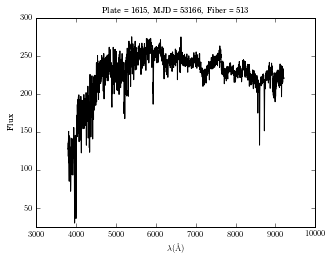

In [3]:
"""
SDSS Spectrum Example
---------------------
Figure 1.2.

An example of an SDSS spectrum (the specific flux plotted as a function of
wavelength) loaded from the SDSS SQL server in real time using Python tools
provided here (this spectrum is uniquely described by SDSS parameters
plate=1615, fiber=513, and mjd=53166).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch single spectrum
plate = 1615
mjd = 53166
fiber = 513

spec = fetch_sdss_spectrum(plate, mjd, fiber)

#------------------------------------------------------------
# Plot the resulting spectrum
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(spec.wavelength(), spec.spectrum, '-k', lw=1)

ax.set_xlim(3000, 10000)
ax.set_ylim(25, 300)

ax.set_xlabel(r'$\lambda {(\rm \AA)}$')
ax.set_ylabel('Flux')
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())

plt.show()

## 1.5.6 SDSS DR7 Quasar Catalog

Reproduce Figure 1.4 showing color (r-i) vs. redshift for SDSS DR7 quasars:

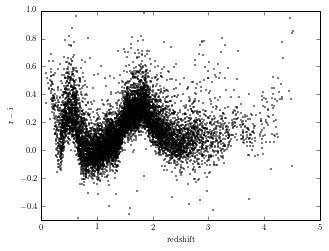

In [4]:
"""
SDSS DR7 Quasars
----------------
Figure 1.4.

The r-i color vs. redshift diagram for the first 10,000 entries from the
SDSS Data Release 7 Quasar Catalog. The color variation is due to emission
lines entering and exiting the r and i band wavelength windows.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
from astroML.datasets import fetch_dr7_quasar

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

r = data['mag_r']
i = data['mag_i']
z = data['redshift']

#------------------------------------------------------------
# Plot the quasar data
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(z, r - i, marker='.', markersize=2, linestyle='none', color='black')

ax.set_xlim(0, 5)
ax.set_ylim(-0.5, 1.0)

ax.set_xlabel(r'${\rm redshift}$')
ax.set_ylabel(r'${\rm r-i}$')

plt.show()

## Access BOSS spectra and metadata

The AstroML tools can only access pre-BOSS SDSS data, i.e. up to data release DR7.  However, all BOSS data (and eventually eBOSS data) can be access with the [https://bossdata.readthedocs.org/en/latest/](bossdata python package), developed here at UCI:

In [5]:
import bossdata
print bossdata.__version__

0.2.9dev


Read the DR12 quasar catalog:

In [6]:
quasar_catalog = bossdata.meta.Database(quasar_catalog=True)

In [7]:
dr12q = quasar_catalog.select_all(what='RA,DEC,Z_VI,PSFMAG_2,PSFMAG_3', max_rows=0)
z = dr12q['Z_VI']
r = dr12q['PSFMAG_2']
i = dr12q['PSFMAG_3']

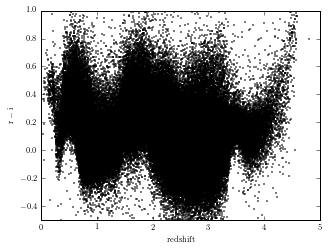

In [8]:
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(z, r - i, marker='.', markersize=2, linestyle='none', color='black')

ax.set_xlim(0, 5)
ax.set_ylim(-0.5, 1.0)

ax.set_xlabel(r'${\rm redshift}$')
ax.set_ylabel(r'${\rm r-i}$')

plt.show()

## 1.6.1 Plotting Two-Dimensional Representations of Large Data Sets

Reproduce Figure 1.9 showing g-r vs r-i for SDSS stripe-82 standard stars as a scatter plot with contours overlayed:

/Users/david/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/Users/david/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


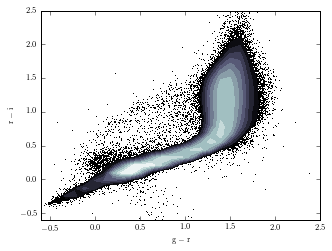

In [9]:
"""
SDSS Stripe 82 Standard Stars
-----------------------------
Figure 1.9.

Scatter plot with contours over dense regions.This is a color-color diagram
of the entire set of SDSS Stripe 82 standard stars; cf. figure 1.6.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt

from astroML.plotting import scatter_contour
from astroML.datasets import fetch_sdss_S82standards

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Fetch the Stripe 82 standard star catalog

data = fetch_sdss_S82standards()

g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']

#------------------------------------------------------------
# plot the results
fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(g - r, r - i, threshold=200, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

ax.set_xlim(-0.6, 2.5)
ax.set_ylim(-0.6, 2.5)

plt.show()

Use the same technique to plot the r-i vs. redshift quasar plot above:

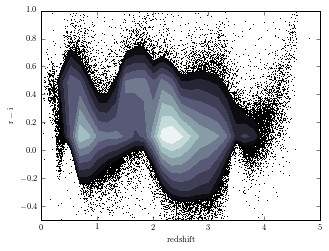

In [10]:
z = dr12q['Z_VI']
r = dr12q['PSFMAG_2']
i = dr12q['PSFMAG_3']

fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(z, r - i, threshold=1000, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlim(0, 5)
ax.set_ylim(-0.5, 1.0)

ax.set_xlabel(r'${\rm redshift}$')
ax.set_ylabel(r'${\rm r-i}$')

plt.show()

## 1.6.3 Plotting Representations of Data on the Sky

Reproduce Figure 1.15 showing the WMAP7 raw temperature map using healpix with nside=512 (~3.1Mpix):

NSIDE = 512
ORDERING = NESTED in fits file
Ordering converted to RING


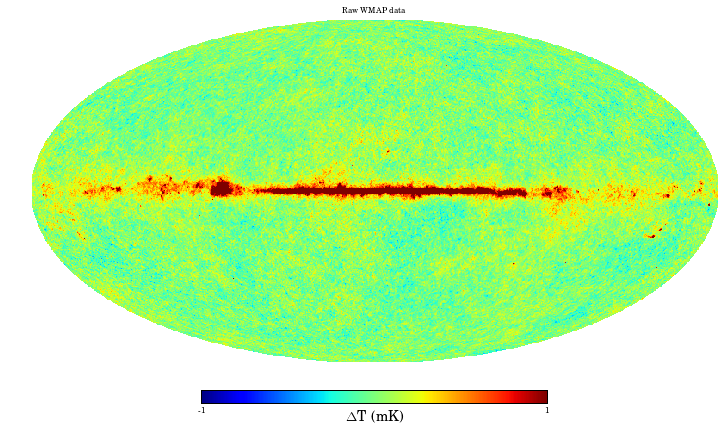

In [11]:
"""
Example of HealPix pixellization
--------------------------------
Figure 1.15.

The top panel shows HEALPix pixels in nested order. The 12 fundamental sky
divisions can be seen, as well as the hierarchical nature of the smaller
pixels. This shows a pixelization with nside = 4, that is, each of the 12
large regions has 4 x 4 pixels, for a total of 192 pixels. The lower panel
shows a seven-year co-add of raw WMAP data, plotted using the HEALPix
projection using the HealPy package. This particular realization has
nside = 512, for a total of 3,145,728 pixels. The pixels are roughly
6.8 arcminutes on a side.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
# warning: due to a bug in healpy, importing it before pylab can cause
#  a segmentation fault in some circumstances.
import healpy as hp

from astroML.datasets import fetch_wmap_temperatures

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Next plot the wmap pixellization
wmap_unmasked = fetch_wmap_temperatures(masked=False)

# plot the unmasked map
fig = plt.figure(2, figsize=(10, 7.5))
hp.mollview(wmap_unmasked, min=-1, max=1, title='Raw WMAP data',
            unit=r'$\Delta$T (mK)', fig=2)

plt.show()

You can make nicer sky plots using the `Basemap` map-projections library.  This example is borrowed from the [bossdata docs](https://github.com/dkirkby/bossdata/blob/master/examples/nb/MakingSkyPlots.ipynb) and shows the number density of BOSS DR12 quasars on the sky:

In [12]:
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PolyCollection

In [13]:
def plot_sky(ra, dec, data=None, nside=16, label='', projection='eck4', cmap=plt.get_cmap('jet'), norm=None,
             hide_galactic_plane=False):
    
    # get pixel area in degrees
    pixel_area = hp.pixelfunc.nside2pixarea(nside, degrees=True)
    # find healpixels associated with input vectors
    pixels = hp.ang2pix(nside, 0.5*np.pi-np.radians(dec), np.radians(ra))
    # find unique pixels
    unique_pixels = np.unique(pixels)
    # count number of points in each pixel
    bincounts = np.bincount(pixels)
    # if no data provided, show counts per sq degree
    # otherwise, show mean per pixel
    if data is None:
        values = bincounts[unique_pixels]/pixel_area
    else:
        weighted_counts = np.bincount(pixels, weights=data)
        values = weighted_counts[unique_pixels]/bincounts[unique_pixels]
    # find pixel boundaries
    corners = hp.boundaries(nside, unique_pixels, step=1)
    corner_theta, corner_phi = hp.vec2ang(corners.transpose(0,2,1))
    corner_ra, corner_dec = np.degrees(corner_phi), np.degrees(np.pi/2-corner_theta)
    # set up basemap
    m = Basemap(projection=projection, lon_0=90, resolution='l', celestial=True)
    m.drawmeridians(np.arange(0, 360, 30), labels=[0,0,1,0], labelstyle='+/-')
    m.drawparallels(np.arange(-90, 90, 15), labels=[1,0,0,0], labelstyle='+/-')
    m.drawmapboundary()
    # convert sky coords to map coords 
    x,y = m(corner_ra, corner_dec)
    # regroup into pixel corners
    verts = np.array([x.reshape(-1,4), y.reshape(-1,4)]).transpose(1,2,0)
    # Make the collection and add it to the plot.
    coll = PolyCollection(verts, array=values, cmap=cmap, norm=norm, edgecolors='none')
    plt.gca().add_collection(coll)
    plt.gca().autoscale_view()
    if not hide_galactic_plane:
        from astropy.coordinates import SkyCoord
        import astropy.units as u
        # generate vector in galactic coordinates and convert to equatorial coordinates
        galactic_l = np.linspace(0, 2*np.pi, 1000)
        galactic_plane = SkyCoord(l=galactic_l*u.radian, b=np.zeros_like(galactic_l)*u.radian, frame='galactic').fk5
        # project to map coordinates
        galactic_x, galactic_y = m(galactic_plane.ra.degree, galactic_plane.dec.degree)
        m.scatter(galactic_x, galactic_y, marker='.', s=2, c='k')
    # Add a colorbar for the PolyCollection
    plt.colorbar(coll, orientation='horizontal', pad=0.01, aspect=40, label=label)
    return m

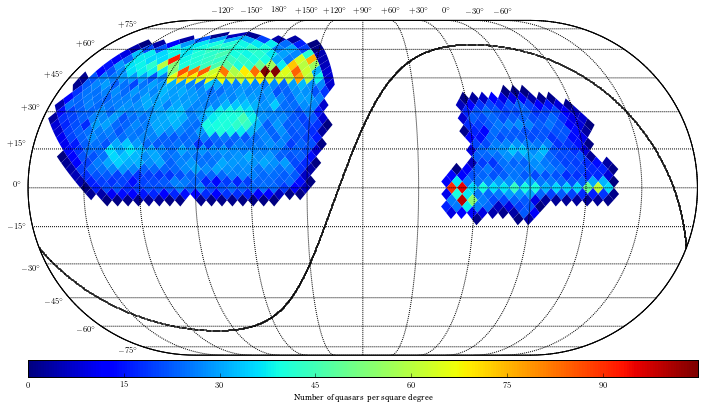

In [14]:
plt.figure(figsize=(12,9))
plot_sky(dr12q['RA'].data, dr12q['DEC'].data, label='Number of quasars per square degree')
plt.show()

## Graphing Extras

Two packages worth exploring for visualization are:
 * [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/): builds on top of matplotlib and provides better defaults and some higher-level graphing functions.
 * [Bokeh](http://bokeh.pydata.org/en/latest/): uses a client-server architecture to allow easy interaction with graphs.
Both of these work in notebooks.  The easiest way to get start is to import `seaborn`, which improves your defaults.

In [15]:
import seaborn as sns

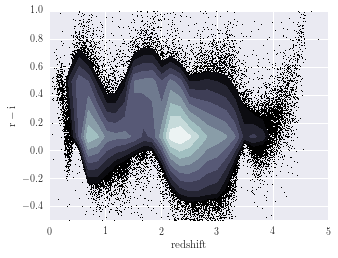

In [16]:
z = dr12q['Z_VI']
r = dr12q['PSFMAG_2']
i = dr12q['PSFMAG_3']

fig, ax = plt.subplots(figsize=(5, 3.75))
scatter_contour(z, r - i, threshold=1000, log_counts=True, ax=ax,
                histogram2d_args=dict(bins=40),
                plot_args=dict(marker=',', linestyle='none', color='black'),
                contour_args=dict(cmap=plt.cm.bone))

ax.set_xlim(0, 5)
ax.set_ylim(-0.5, 1.0)

ax.set_xlabel(r'${\rm redshift}$')
ax.set_ylabel(r'${\rm r-i}$')

plt.show()